## Module 4: *(Template)*

**RENAME THE FILE TO INCLUDE YOUR COMPANY, GROUP NUMBER, AND LAST NAMES**

**E.G. Elmqivst_Lee_Shee_MODULE4 

## Team Members:
Luke Shee, Christy Lee (Group 5)

## Project Title:
Utilizing differential equations to analyze the number of COVID cases in China 



## Project Goal:
The goal of the project is to model COVID in China utilizing an SIR model

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

* Prevalence & incidence
    * Incidence: 
        * Across the world, around 22 thousand COVID-19 cases were reported (though not confirmed) to the World Health Organization (WHO) over the past week, not including data from the U.S. or China. Cumulatively, there has been 778.9 million COVID-19 cases reported to the WHO globally as of November 11, 2025.
            * Source: https://data.who.int/dashboards/covid19/cases
        * Up to April 13, 2024, China had a total of around 503 thousand COVID-19 cases.
            * Source: https://www.worldometers.info/coronavirus/country/china/
    * Prevalence: 
        * On April 13, 2024, China had approximately 119 thousand active COVID-19 cases 
            * Source: https://www.worldometers.info/coronavirus/country/china/

* Economic burden
    * There is an estimated cost of $671.4 per patient 
    * some studies reveal that direct medical costs ranged from $1264-$79315 
    * the total ecnomic burden of COVID was estimated to be between $77 billion-2.7 trillion in 2019
    * the quarantine costs of COVID exceeded 9% of the global GDP
        * Source: https://pmc.ncbi.nlm.nih.gov/articles/PMC10870589/

* Risk factors (genetic, lifestyle) & Societal determinants
    * people ages 65 and older and babies younger than 6 months have a higher risk of serious COVID infection and likelihood of requiring hospital care
    * babies younger than 6 months aren't eligible for the COVID vaccine, increasing their risk
    * People with heart disease, diabetes, chronic lung diseases, obseity, and chronic kidney diseases are more likely to have severe cases of COVID
    * The risk of having COVID is higher for people with lung diseases such as COPD and Asthma
    * Having the COVID vaccine will lower risks of severe COVID
    * regularly washing hands throughout the day, wearing a mask, avoiding close contact with anyone that is sick or is showing symptoms will lower risk of getting COVID
        * Source: https://www.mayoclinic.org/diseases-conditions/coronavirus/in-depth/coronavirus-who-is-at-risk/art-20483301 

* Symptoms
    * fever or chills 
    * cough
    * shortness of breath or difficulty breathing
    * sore throat
    * congestion or runny nose
    * loss of taste or smell
    * fatigue
    * muscle or body aches
    * headache
    * nausea or vomiting
    * diarrhea
        * Source: https://www.cdc.gov/covid/signs-symptoms/index.html 

* Diagnosis
    * There are 2 main types of tests to help diagnose COVID 
        * molecular tests: look for genetic material from the COVID virus.
            * polymerase chain reaction tests are molecular tests. PCR tests are more accurate than an antigen test
            * molecular tests can be done at home
        * Antigen tests: look for viral proteins called antigens
            * this is typically a rapid COVID test or an at-home COVID test
        * Source: https://www.mayoclinic.org/diseases-conditions/coronavirus/diagnosis-treatment/drc-20479976 

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    * SARS-CoV-2 entry into the cell involces the binding of the spike protein on the surface of COVID onto a receptor on the outer membrane of the cell,  angiotensin-converting enzyme 2 (ACE2), causing membrane fusion
        * Source: https://www.nature.com/articles/s41580-021-00418-x
    

## Dataset: 

* The data listing confirmed COVID-19 cases per day in several countries from 2020 to 2023 was retrieved from the following GitHub page: https://github.com/CSSEGISandData/COVID-19
    * The data was gathered and managed by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE), along with the assistance of the John Hopkins Applied Physics lab and ESRI Living Atlas Team. The university center initially collected this data into the above repository to create a visual dashboard application to track and display COVID cases globally over time.
        * John Hopkins University Center gathered data on the quantity of COVID-19 cases from a great number of sources, including (but not limited to) the Chinese online health platform DXY (https://ncov.dxy.cn/ncovh5/view/pneumonia), the World Health Organization (https://www.who.int/), the US CDC (https://www.cdc.gov/coronavirus/2019-ncov/index.html), WorldoMeters (https://www.worldometers.info/coronavirus/), The Covid Tracking Project (https://covidtracking.com/data), online news sources like LA Times and Mercury News, and several public government records from U.S. State Departments and other countries worldwide.
        * The project was later announced and reported on in a journal article authored by Ensheng Dong, Hongru Du, and Lauren Gardner: https://pubmed.ncbi.nlm.nih.gov/32087114/
    * The data was later subsetted by Prof. Groves to only include entries with dates ranging from 2022-02-22 to 2022-05-10 and the number of confirmed cases each day between that time frame

* Concerning bias, the authors, who first reported the visual dashboard application and its corresponding datasets of COVID-19 cases, declared no competing interests, though the team was financially supported by the John Hopkins University, National Science Foundation (NSF), Bloomberg Philantrophies, and Stavros Niarchos Foundation. The list of data sources recorded also do not indicate any bias from the collector's perspective.
* The sources of COVID-19 confirmed cases, where the current dataset colleced its data from, are assumed to have recorded its COVID-19 data truthfully and as accurately as reasonably possible. Although, some data sources may have been limited in the efficiency in which they can accurately estimate, record, and report COVID-19 cases on a daily basis.  

* The dataset utilized by our team involves the number of confirmed cases per day in China over the 2022-02-22 to 2022-05-10 period.
  * There are two columns in the dataset: "date" that holds values signifying certain dates when confirmed COVID-19 cases were measured/updated, and "confirmed_cases" that contains integer values representing the number of registered COVID-19 cases up to the date besides it.
  * Rows represent different, consecutive dates between February 22, 2022, and May 10, 2022.
 

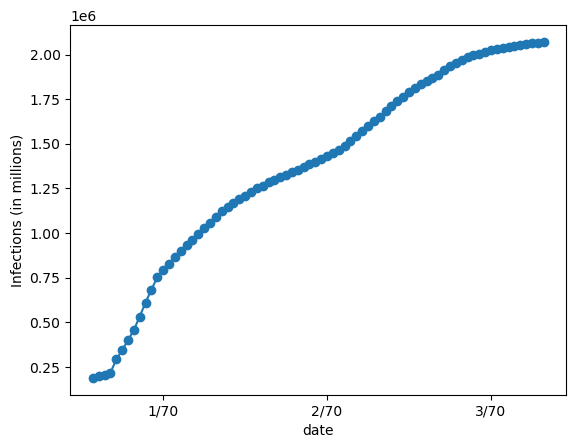

In [18]:
import numpy as np, pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# COVID NUMBERS
N = 1410000000/1e6  # US population in millions
df_full = pd.read_csv("covid_china_data_spring_2022_cumulative (1).csv")
df_full['confirmed_cases'] = df_full['confirmed_cases'] 
# df_full = df_full[(df_full['date'] <= '2021-03-17')&(df_full['date'] >= '2020-09-17')]
df_full.head()



plt.plot(df_full['date'], df_full['confirmed_cases'], 'o-')
plt.xlabel('date'); plt.ylabel('Infections (in millions)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.show()


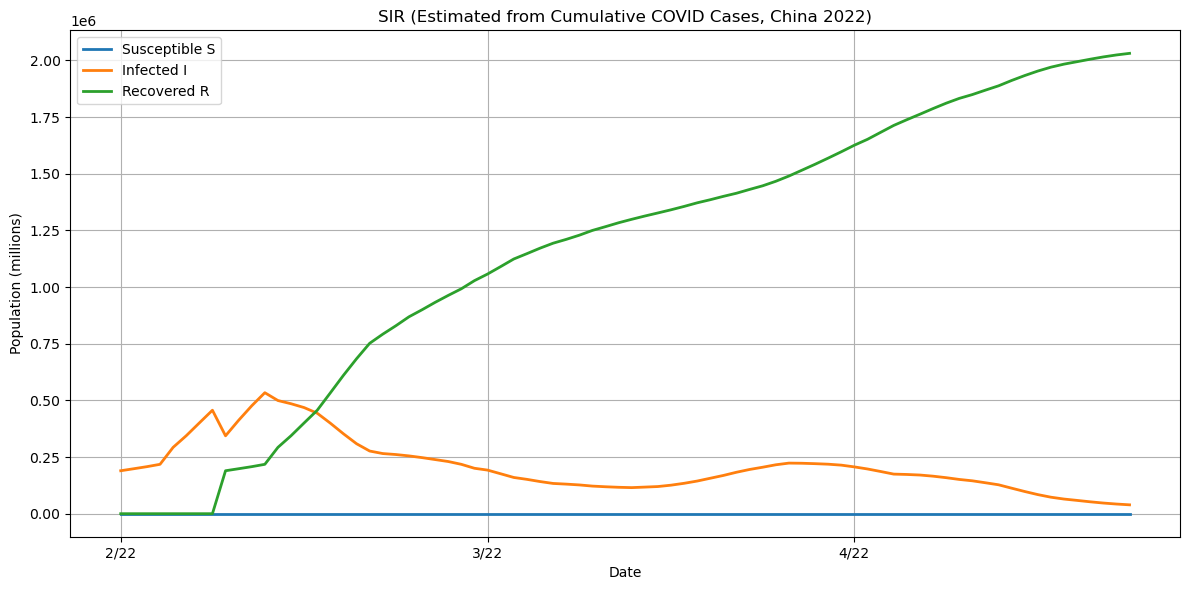

In [19]:
#check this
from main_functions import convert_cumulative_to_SIR

sir_df = convert_cumulative_to_SIR(
    df_full,
    date_col='date',
    cumulative_col='confirmed_cases',
    population=N,              # your N = population in millions
    infectious_period=8,       # typical COVID infectious period
    new_case_col='new_cases',
    I_col='I',
    R_col='R',
    S_col='S'
)

plt.figure(figsize=(12,6))

plt.plot(sir_df['date'], sir_df['S'], label='Susceptible S', linewidth=2)
plt.plot(sir_df['date'], sir_df['I'], label='Infected I', linewidth=2)
plt.plot(sir_df['date'], sir_df['R'], label='Recovered R', linewidth=2)

plt.xlabel("Date")
plt.ylabel("Population (millions)")
plt.title("SIR (Estimated from Cumulative COVID Cases, China 2022)")
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.grid(True)
plt.tight_layout()
plt.show()


## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*


### Analysis
#### 1. Fitting the SIR Model

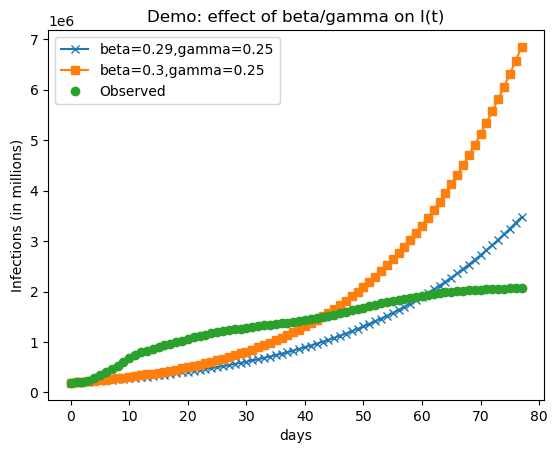

315054894490.2398
2360669047505.2554


In [4]:
# Euler integrator function (already defined above but re-defining for clarity)
from main_functions import euler_sir
N = 1410000000

df_full = pd.read_csv("covid_china_data_spring_2022_cumulative (1).csv")

I_obs = df_full['confirmed_cases'].values.astype(float)   # Set up I_obs array from data directly
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs)) # time array in days

I0_obs = df_full.iloc[0]['confirmed_cases']
R0_obs = 0.0
S0_obs = N - I0_obs - R0_obs

beta1 = .29 #random guess for beta
gamma1 = 1/4 #random guess for gamma
beta2 = 0.30 #alternative guesses
gamma2 = 1/4 #alternative guesses
S1,I1,R1 = euler_sir(beta1, gamma1,S0_obs, I0_obs, R0_obs, t_obs, N)
S2,I2,R2 = euler_sir(beta2, gamma2, S0_obs, I0_obs, R0_obs, t_obs, N)

plt.plot(t_obs, I1, label=f'beta={beta1},gamma={gamma1}', marker='x')
plt.plot(t_obs, I2, label=f'beta={beta2},gamma={gamma2}', marker='s')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('days')
plt.ylabel('Infections (in millions)')
plt.title('Demo: effect of beta/gamma on I(t)')
plt.show()

print(np.mean((I1 - I_obs)**2))

print(np.mean((I2 - I_obs)**2))


We were unable to get the predictions better than what is shown in the blue graph

#### 2. Predict "the future" with your fit SIR model

{'beta': 0.99, 'gamma': 0.92, 'value': np.float64(80249505436.19705)}


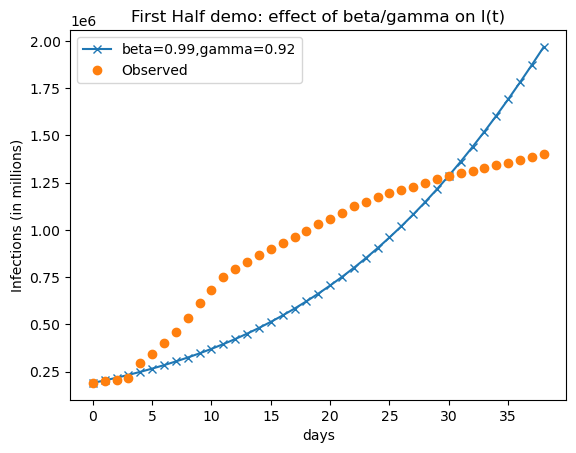

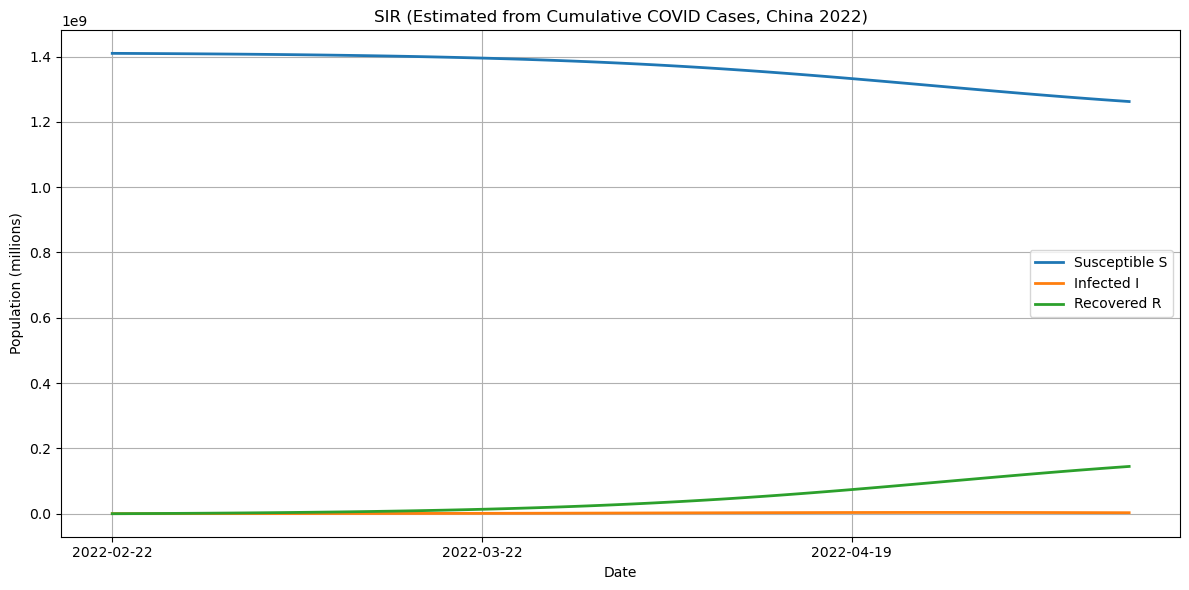

In [5]:
# Use euler's method and your optimization routine above to find new gamma and beta on the  
# FIRST HALF of the data, then simulate the SIR model forward in time using those parameters and plot.


import pandas as pd

df_full = pd.read_csv("covid_china_data_spring_2022_cumulative (1).csv")

I_obsfull = df_full['confirmed_cases'].values.astype(float)   # Set up I_obs array from data directly
t_obsfull = np.linspace(0, len(I_obsfull)-1, len(I_obsfull)) # time array in days

# Split the dataset to retrieve only the first half
midpoint = int(len(df_full) / 2)
df_half = df_full.iloc[:midpoint]


# Find good beta and gamma using Euler's and plot I
from main_functions import euler_sir
N = 1410000000

I_obs = df_half['confirmed_cases'].values.astype(float)   # Set up I_obs array from data directly
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs)) # time array in days

I0_obs = df_half.iloc[0]['confirmed_cases']
R0_obs = 0.0
S0_obs = N - I0_obs - R0_obs

min_SSE = {"beta": 0, "gamma": 0, "value": float("inf")}
half_I = None
for b in range(0, 100):
    for g in range(0, 100):
        S,I,R = euler_sir(b * 0.01, g * 0.01, S0_obs, I0_obs, R0_obs, t_obs, N)
        #print(np.mean((I - I_obs)**2))
        if np.mean((I - I_obs)**2) < min_SSE['value']:
            min_SSE['value'] = np.mean((I - I_obs)**2)
            min_SSE['beta'] = b * 0.01
            min_SSE['gamma'] = g * 0.01
            half_I = I

print(min_SSE)

plt.plot(t_obs, half_I, label=f'beta={min_SSE["beta"]},gamma={min_SSE["gamma"]}', marker='x')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('days')
plt.ylabel('Infections (in millions)')
plt.title('First Half demo: effect of beta/gamma on I(t)')
plt.show()


### Plotting SIR with full time array

I_obsTest = df_full['confirmed_cases'].values.astype(float)   
t_full = np.linspace(0, len(I_obsTest)-1, len(I_obsTest)) # time array in days
S,I,R = euler_sir(min_SSE['beta'], min_SSE['gamma'], S0_obs, I0_obs, R0_obs, t_full, N)

plt.figure(figsize=(12,6))

plt.plot(sir_df['date'], S, label='Susceptible S', linewidth=2)
plt.plot(sir_df['date'], I, label='Infected I', linewidth=2)
plt.plot(sir_df['date'], R, label='Recovered R', linewidth=2)

plt.xlabel("Date")
plt.ylabel("Population (millions)")
plt.title("SIR (Estimated from Cumulative COVID Cases, China 2022)")
plt.legend()

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.grid(True)
plt.tight_layout()
plt.show()



{'beta': 0.65, 'gamma': 0.63, 'value': np.float64(273760051.16840917)}


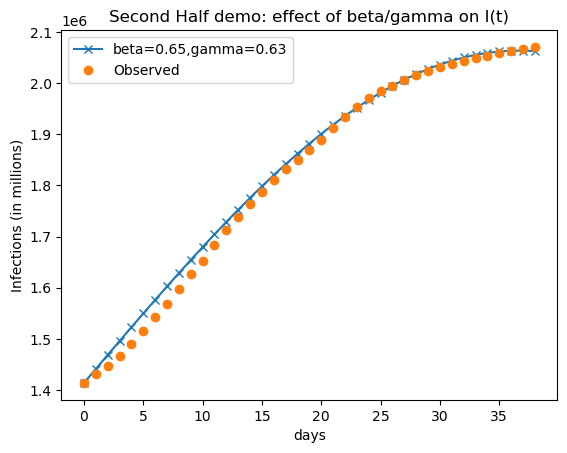

In [19]:
# Calculating SSE between model predictions and data on the SECOND HALF of the data.

import pandas as pd

df_full = pd.read_csv("covid_china_data_spring_2022_cumulative (1).csv")

I_obsfull = df_full['confirmed_cases'].values.astype(float)   # Set up I_obs array from data directly
t_obsfull = np.linspace(0, len(I_obsfull)-1, len(I_obsfull)) # time array in days

# Split the dataset to retrieve only the second half
midpoint = int(len(df_full) / 2)
df_half2 = df_full.iloc[midpoint:]


# Find good beta and gamma using Euler's and plot I 
from main_functions import euler_sir
N = 1410000000

I_obs = df_half2['confirmed_cases'].values.astype(float)   # Set up I_obs array from data directly
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs)) # time array in days

I0_obs = df_half2.iloc[0]['confirmed_cases']
R0_obs = 0.0
S0_obs = N - I0_obs - R0_obs

min_SSE = {"beta": 0, "gamma": 0, "value": float("inf")}
half_I = None 
for b in range(0, 100):
    for g in range(0, 100):
        S,I,R = euler_sir(b * 0.01, g * 0.01, S0_obs, I0_obs, R0_obs, t_obs, N)
        #print(np.mean((I - I_obs)**2))
        if np.mean((I - I_obs)**2) < min_SSE['value']:
            min_SSE['value'] = np.mean((I - I_obs)**2)
            min_SSE['beta'] = b * 0.01
            min_SSE['gamma'] = g * 0.01
            half_I = I

print(min_SSE)

plt.plot(t_obs, half_I, label=f'beta={min_SSE["beta"]},gamma={min_SSE["gamma"]}', marker='x')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('days')
plt.ylabel('Infections (in millions)')
plt.title('Second Half demo: effect of beta/gamma on I(t)')
plt.show()


**Is the new gamma and beta close to what you found on the full dataset? Is the fit much worse? What is the SSE calculated for the second half of the data?**

*Fill in answer here*

In [ ]:
# Calculating SSE between model predictions and data on the SECOND HALF of the data.


<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">Key Point:</b> 

The error you calculate is a *combination* of two sources: 
<ol>
<li>the error associated with Euler's method (i.e. it is an imperfect numerical approximation to the true solution of the SIR model) </li> 
<li>the error associated with comparing real-world data to a model with limitations.</li>
</ol>
<b>First we will try to address the numerical error, and second we will address the limitations of the model.</b>

</div>



**Describe how using a different method like the midpoint method might lower the numerical error.**

By utilizing a different method like the midpoint method, we are able to use different slopes that provide a better representation of the data. Euler's method utilizes the slope at the beginning of the function to predict future values whereas the midpoint method utilizes the average slope to predict values. Utilizing average slope rather than the slope at the beginning allows us to be more representative of the data as a whole.

* Euler's method is a first order RK method whereas the midpoint method is a second order RK method. Because the midpoint method is of a higher order, there is less error

#### 3. Decreasing numerical error with the RK4 Method

The following code calculates the ideal beta and gamma values for the entire dataset and trains the RK4 model on the entire dataset. The graph of the actual and predicted values is shown and the values of the ideal gamma, beta, and sse values when they are used for the RK4 model are printed. From this, we can see that the best beta is 0.96, the best gamma is 0.91, and the sse value when they are used is 105831922772.738

Optimal parameters:
{'beta': 0.96, 'gamma': 0.91, 'value': np.float64(105831922772.738)}


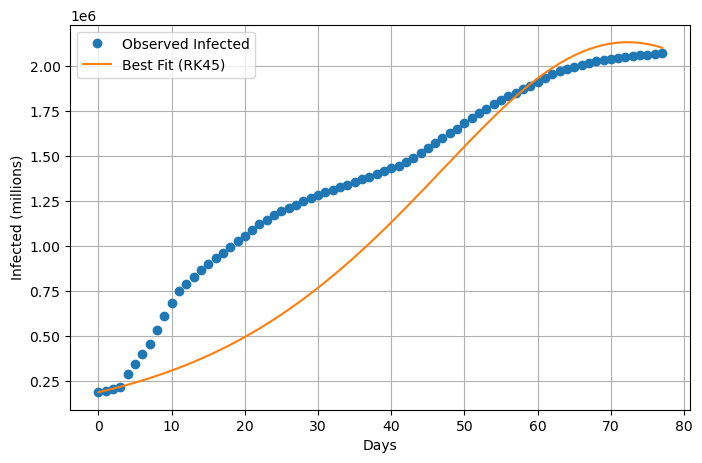

In [16]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

df = pd.read_csv("covid_china_data_spring_2022_cumulative (1).csv")
I_obs = df["confirmed_cases"].values
t_obs = np.arange(len(I_obs))

N = 1410000000

I0_obs = I_obs[0]
R0_obs = 0.0
S0_obs = N - I0_obs - R0_obs


def sir_odes(t, y, beta, gamma):
    S, I, R = y
    dS = -beta * S * I / N
    dI = beta * S * I / N - gamma * I
    dR = gamma * I
    return [dS, dI, dR]


def solve_sir(beta, gamma, S0, I0, R0, t_eval):
    sol = solve_ivp(
        lambda t, y: sir_odes(t, y, beta, gamma),
        (t_eval[0], t_eval[-1]),
        [S0, I0, R0],
        t_eval=t_eval,
        method="RK45"
    )
    S, I, R = sol.y
    return S, I, R


min_SSE = {"beta": 0, "gamma": 0, "value": float("inf")}
best_I_curve = None
for b in range(0, 100):      
    for g in range(0, 100):   
        beta = b * 0.01
        gamma = g * 0.01
        S, I, R = solve_sir(beta, gamma, S0_obs, I0_obs, R0_obs, t_obs)
        mse = np.mean((I - I_obs)**2)
        if mse < min_SSE["value"]:
            min_SSE["value"] = mse
            min_SSE["beta"] = beta
            min_SSE["gamma"] = gamma
            best_I_curve = I 
print("Optimal parameters:")
print(min_SSE)


plt.figure(figsize=(8,5))
plt.plot(t_obs, I_obs, "o", label="Observed Infected")
plt.plot(t_obs, best_I_curve, "-", label="Best Fit (RK45)")
plt.xlabel("Days")
plt.ylabel("Infected (millions)")
plt.legend()
plt.grid()
plt.show()


The following code utilizes the RK4 method on the first half of data to determine the ideal beta and gamma values. The same beta and gamma values obtained from the first half of the data are used on the second half of the data to predict the number of those infected with COVID. The sse value from the beta and gamma values obtained from the first half of the data are shown below as well as the sse values obtained when those same beta and gamma values were applied to the second half the data. The graph shows the actual vs predicted utilizing the RK4 method. The red vertical line indicates the separation between the training and test data set halves.

best geta and gamma found from the first half: 
{'beta': 0.99, 'gamma': 0.92, 'value': np.float64(85538844262.94655)}

SSE on SECOND HALF (RK45 model trained on first half):
86650668492162.27
True


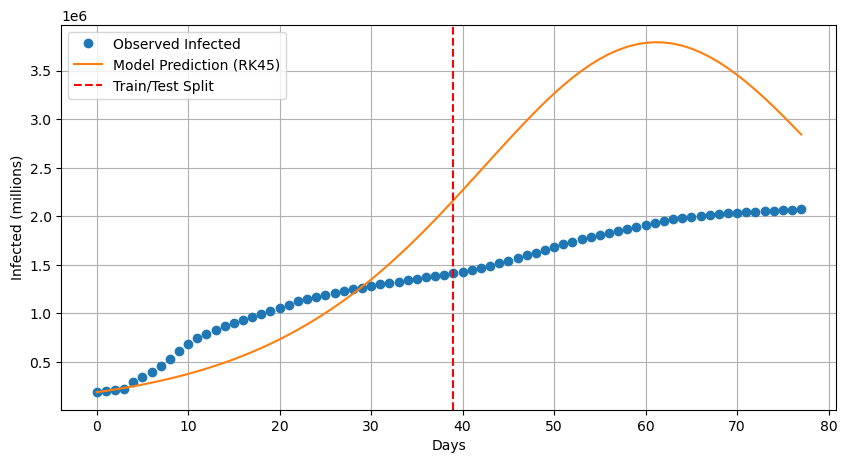

In [20]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- Load data ---
df = pd.read_csv("covid_china_data_spring_2022_cumulative (1).csv")
I_obs = df["confirmed_cases"].values
t_obs = np.arange(len(I_obs))

N = 1410000000

# Initial conditions
I0_obs = I_obs[0]
R0_obs = 0.0
S0_obs = N - I0_obs - R0_obs

# ---- SIR ODE system ----
def sir_odes(t, y, beta, gamma):
    S, I, R = y
    dS = -beta * S * I / N
    dI = beta * S * I / N - gamma * I
    dR = gamma * I
    return [dS, dI, dR]

def solve_sir(beta, gamma, S0, I0, R0, t_eval):
    sol = solve_ivp(
        lambda t, y: sir_odes(t, y, beta, gamma),
        (t_eval[0], t_eval[-1]),
        [S0, I0, R0],
        t_eval=t_eval,
        method="RK45"
    )
    S, I, R = sol.y
    return S, I, R

#training on first half of data
mid = len(I_obs) // 2
t_train = t_obs[:mid]
I_train = I_obs[:mid]

min_SSE = {"beta": 0, "gamma": 0, "value": float("inf")}

# find the best beta and gamma values
for b in range(0, 100):      
    for g in range(0, 100):   
        beta = b * 0.01
        gamma = g * 0.01

        S, I, R = solve_sir(beta, gamma, S0_obs, I0_obs, R0_obs, t_train)
        mse = np.mean((I - I_train)**2)

        if mse < min_SSE["value"]:
            min_SSE["value"] = mse
            min_SSE["beta"] = beta
            min_SSE["gamma"] = gamma

print("best geta and gamma found from the first half: ")
print(min_SSE)


beta_best = min_SSE["beta"]
gamma_best = min_SSE["gamma"]

S_full, I_full, R_full = solve_sir(beta_best, gamma_best, S0_obs, I0_obs, R0_obs, t_obs)


I_pred_second_half = I_full[mid:]
I_obs_second_half = I_obs[mid:]

SSE_second_half = np.sum((I_pred_second_half - I_obs_second_half)**2)

print("\nSSE on SECOND HALF (RK45 model trained on first half):")
print(SSE_second_half)


plt.figure(figsize=(10,5))

plt.plot(t_obs, I_obs, "o", label="Observed Infected")
plt.plot(t_obs, I_full, "-", label="Model Prediction (RK45)")

#draw a line down the middle to show where the test and train cutoff is
plt.axvline(mid, color="red", linestyle="--", label="Train/Test Split")


plt.xlabel("Days")
plt.ylabel("Infected (millions)")
plt.legend()
plt.grid()
plt.show()



Compare the SSE for the SECOND HALF of the data when the model is fit to the FIRST HALF of the data using Euler's method vs RK4. Did RK4 do a better job?  Why or why not?

*Fill in answer here*

#### 4. Improving model fit by overcoming model limitations

Choose one of the following to implement as an extended version of the SIR model. Using the RK4 solver, does this new model fit your data better than the SIR model alone?

<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">Options to overcome limitations (choose ONE to implement):</b> 

<ol>
<li> Include births in the model as described in reading.</li> 
<li>Include deaths in the model as described in reading.</li>
<li>Include an exposed compartment (SEIR model). </li>
<li>Include loss of immunity (i.e. R population can go back to S population).</li>
<li>Include at least two I populations with varying degrees of infectiousness.</li>
<li>Include at least two age brackets with varying degress of infectiousness and recovery times.</li>

</ol>

Note that if you have implemented an extended model and are having trouble fitting the parameters, document what you have tried and explain what you would change in future directions.
</div>



In [ ]:
# Extended model implementation, parameter fitting, and plotting.

## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 

* from the Euler's method technique used in part 1 of the analysis section, it can be seen that no beta or gamma values were very accurate. 
    * with beta = 0.29 and gamma = 0.25, we were able to achieve the closest values to the actual. Towards the end of the graph, it can be seen that there will be an increase in the estimated values while the actual values stay relatively consistent. This indicates that if this model were to be used to predict future values, it would have become increasingly inaccurate.

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

### Progress Notes
- 11/18/2025: Started project, shared a GitHub page with each other, figured out and debugged inital in_class_COVID and main_functions python files given.
- 11/20/2025: Began filling out our Jupyter notebook in class as well as the code (Christy did most of the background and code, and Luke did the Dataset description and other miscelaneous areas).
- 11/22/2025: Finished up code and notes for first module check-in.
- 12/2/2025: finish up code for second module check in (RK4 method not covered yet in class)
### Code Progress
All code progress and commit history is recorded on the team's shared GitHub page linked here: https://github.com/christylee1/Module4_covid


## QUESTIONS FOR YOUR TA: 

### First Module Check-in Questions
- There wasn't many online sources displaying updated prevalance and incidence rates for COVID in China and in general. Do you know any good sources for current COVID data in countries like China that we've missed, or should we stick to the prevalence and incidence background sources we have currently (which are quite outdated)?
- Are all our sections looking good? Is there any areas we need to add a bit more in?